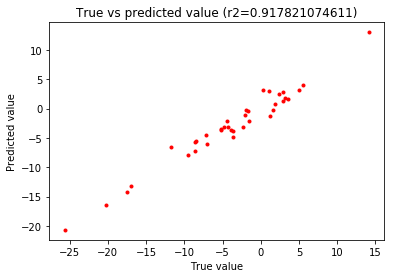

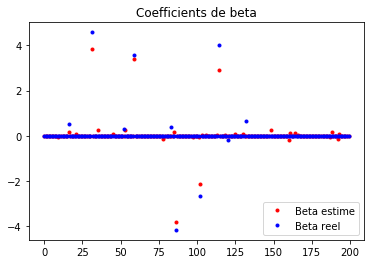

0.0368606838317


In [15]:
#inspire de http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html


import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

# generation de donnee synthetiques...
np.random.seed(31)

#n=100, n=75, n=50, n=25
#... definition de n et p
n = 75
p =  200   #remarque : n<200 => necessite de selectionner des variables

#... simulation de X
X = np.random.randn(n, p) #remarque : on ne tient pas en compte les $beta_0$

#... generation du vecteur beta dans lequel seules 10 valeurs sont non-nulles
beta = 3 * np.random.randn(p)
inds = np.arange(p)
np.random.shuffle(inds)
beta[inds[10:]] = 0 

#... simulation de y 
y = np.dot(X, beta) + (0.01 * np.random.normal(size=n))
# REMARQUE IMPORTANTE : y ne dépend que des variables i pour lesquelles beta[i] est non-nul

# ... coupe en deux les donnees en donnees d'apprentissage et donnes test
thresh=n // 2
X_train = X[thresh:]
y_train = y[thresh:]
X_test = X[:thresh]
y_test = y[:thresh]

# regression lineaire avec regularisation Lasso ...

#... regression
from sklearn.linear_model import Lasso

alpha = 0.1
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

#... representation du resultat

fig = plt.figure()
plt.plot(y_test, y_pred_lasso, 'r.')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('True vs predicted value (r2='+str(r2_score_lasso)+')')
plt.show()



fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()
print(np.mean(np.abs(lasso_regressor.coef_-beta)))


### QUESTION 1:
Jouez l'exemple avec n=100, n=75, n=50, n=25. Qu'en deduisez vous sur l'impact du nombre d'observations

Moins il y a d'observations, plus il y a d'erreur

### QUESTION 2:
On garde n=75. Utiliser la validation croisee de type K-folds pour trouver le meilleur coefficient alpha
au sens de R2.
AIDE : Pour comprendre l'utilisation de K-folds sous sklearn vous pouvez jouer l'exemple ci-dessous



In [34]:
from sklearn.model_selection import KFold

data = np.random.randn(12,3)
kf = KFold(n_splits=3)
alpha_lst=[0.0001,0.001,0.01,0.1,1,10] #recherche grossiere
alpha_lst=[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01] #recherche grossiere
for alpha in alpha_lst:
    r2_lst=[]
    for train, test in kf.split(X):
        """
        print("+++++++++++++++++++++++++++++++++++++++")
        print('train='+str(train)+':')
        print(str(data[train,:]))
        print('test='+str(test)+':')
        print(str(data[test,:]))
        print("+++++++++++++++++++++++++++++++++++++++")
        """
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]

        lasso_regressor = Lasso(alpha=alpha)
        lasso_regressor.fit(X_train, y_train)

        y_pred_lasso = lasso_regressor.predict(X_test)
        r2_score_lasso = r2_score(y_test, y_pred_lasso)
        r2_lst.append(r2_score_lasso)
    print(np.mean(r2_lst))
#the best one seems to be 0.008


0.24347635787
0.87305678718
0.968657242328
0.989114681611
0.994541687443
0.997009791916
0.998326425559
0.99878329202
0.998689902978
0.998541583071


/home/vacat/x.olive/students/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### QUESTION 3:
EVENTUELLEMENT : Comparez les resultats LASSO avec ceux d'ElasticNet
Utilisez : from sklearn.linear_model import ElasticNet
puis : enet_regressor = ElasticNet(alpha=alpha, l1_ratio=0.7)


In [38]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold

data = np.random.randn(12,3)
kf = KFold(n_splits=3)
alpha_lst=[0.0001,0.001,0.01,0.1,1,10] #recherche grossiere
alpha_lst=[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01] #recherche grossiere
#alpha_lst=[0.08]
for alpha in alpha_lst:
    r2_lst,r2_enet_lst=[],[]
    for train, test in kf.split(X):
        
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]

        lasso_regressor = Lasso(alpha=alpha)
        enet_regressor = ElasticNet(alpha=alpha, l1_ratio=0.7)
        lasso_regressor.fit(X_train, y_train)
        enet_regressor.fit(X_train, y_train)
        
        y_pred_lasso = lasso_regressor.predict(X_test)
        r2_score_lasso = r2_score(y_test, y_pred_lasso)
        r2_lst.append(r2_score_lasso)
        
        y_pred_enet = enet_regressor.predict(X_test)
        r2_score_enet = r2_score(y_test, y_pred_enet)
        r2_enet_lst.append(r2_score_enet)
    print(np.mean(r2_lst))
    print(np.mean(r2_enet_lst))
    print("--------")

/home/vacat/x.olive/students/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.24347635787
-0.0748281012088
--------
0.87305678718
0.429587418098
--------
0.968657242328
0.555570107402
--------
0.989114681611
0.604254452101
--------
0.994541687443
0.616616394555
--------
0.997009791916
0.621095343638
--------
0.998326425559
0.624443678138
--------
0.99878329202
0.625567378286
--------
0.998689902978
0.626216572806
--------
0.998541583071
0.62714290157
--------
